In [1]:
from scipy import *
from numpy import *
from matplotlib import *
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import stock
import matplotlib.dates as mdates

In [26]:
# DOWNLOAD NIFTY HISTORICAL PRICE FROM
# https://www.niftyindices.com/reports/historical-data

#index
df2 = pd.read_csv('/Users/kishor/Downloads/^NSEBANK.csv') # usecols=[0,4]
#df2.dropna(subset=['Close'], inplace=True)

# Company/Equity
df1 = pd.read_csv('/Users/kishor/Downloads/HDFCBANK.NS.csv', nrows=len(df2)) # usecols=[0,4]
#df1.dropna(subset=['Close'], inplace=True)
#df2 = df2.len(df1)

df1.tail(5)


,Date,Open,High,Low,Close,Adj Close,Volume
243,2021-10-11,1599.900024,1645.000000,1599.000000,1633.800049,1633.800049,6540424.0
244,2021-10-12,1625.000000,1641.550049,1625.000000,1629.599976,1629.599976,4088473.0
245,2021-10-13,1637.000000,1648.000000,1630.000000,1639.400024,1639.400024,3112822.0
246,2021-10-14,1638.000000,1690.000000,1638.000000,1687.400024,1687.400024,7378644.0
247,2021-10-18,1705.000000,1725.000000,1667.050049,1670.300049,1670.300049,14427082.0


In [27]:
# Comapny
df1['Daily Rt'] = (df1['Close']/df1['Close'].shift(1)) - 1
company_rt = df1['Daily Rt'].fillna(0)
#index
df2['Daily Rt'] = (df2['Close']/df2['Close'].shift(1)) - 1
nifty_rt  = df2['Daily Rt'].fillna(0)

nif = nifty_rt - nifty_rt.mean()
com = company_rt - company_rt.mean()
dy = nif.dot(com)
dx = nif.dot(nif)
slope = dy/dx
print(" beta = " , round(slope,2))
print(" Equity price would increase " , round(slope,2),  "% times")

 beta =  0.87
 Equity price would increase  0.87 % times


In [160]:
from scipy import stats
slope1, intercept, r_value, p_value, std_err = stats.linregress(df2['Daily Rt'].fillna(0), df1['Daily Rt'].fillna(0))
print(" beta = " , round(slope1,2))

 beta =  0.81


In [161]:
slope2, intercept = np.polyfit(df2['Daily Rt'].fillna(0), df1['Daily Rt'].fillna(0), 1)
print(" beta = " , round(slope2,2))

 beta =  0.81


In [35]:
def beta(df1, df2):
    df1['Daily Rt'] = (df1['Close']/df1['Close'].shift(1)) - 1
    df2['Daily Rt'] = (df2['Close']/df2['Close'].shift(1)) - 1
    company_rt = df1['Daily Rt'].fillna(0)
    nifty_rt  = df2['Daily Rt'].fillna(0)

    nif = nifty_rt - nifty_rt.mean()
    com = company_rt - company_rt.mean()
    dy = nif.dot(com)
    dx = nif.dot(nif)
    slope = dy/dx
    print(" beta = " , round(slope,2))
    print(" Equity price would increase " , round(slope,2),  "% times")

In [36]:
beta(df1,df2)

 beta =  0.17
 Equity price would increase  0.17 % times


Daily Volatility =  1.7564 %
Annual Volatility =  27.6035 %


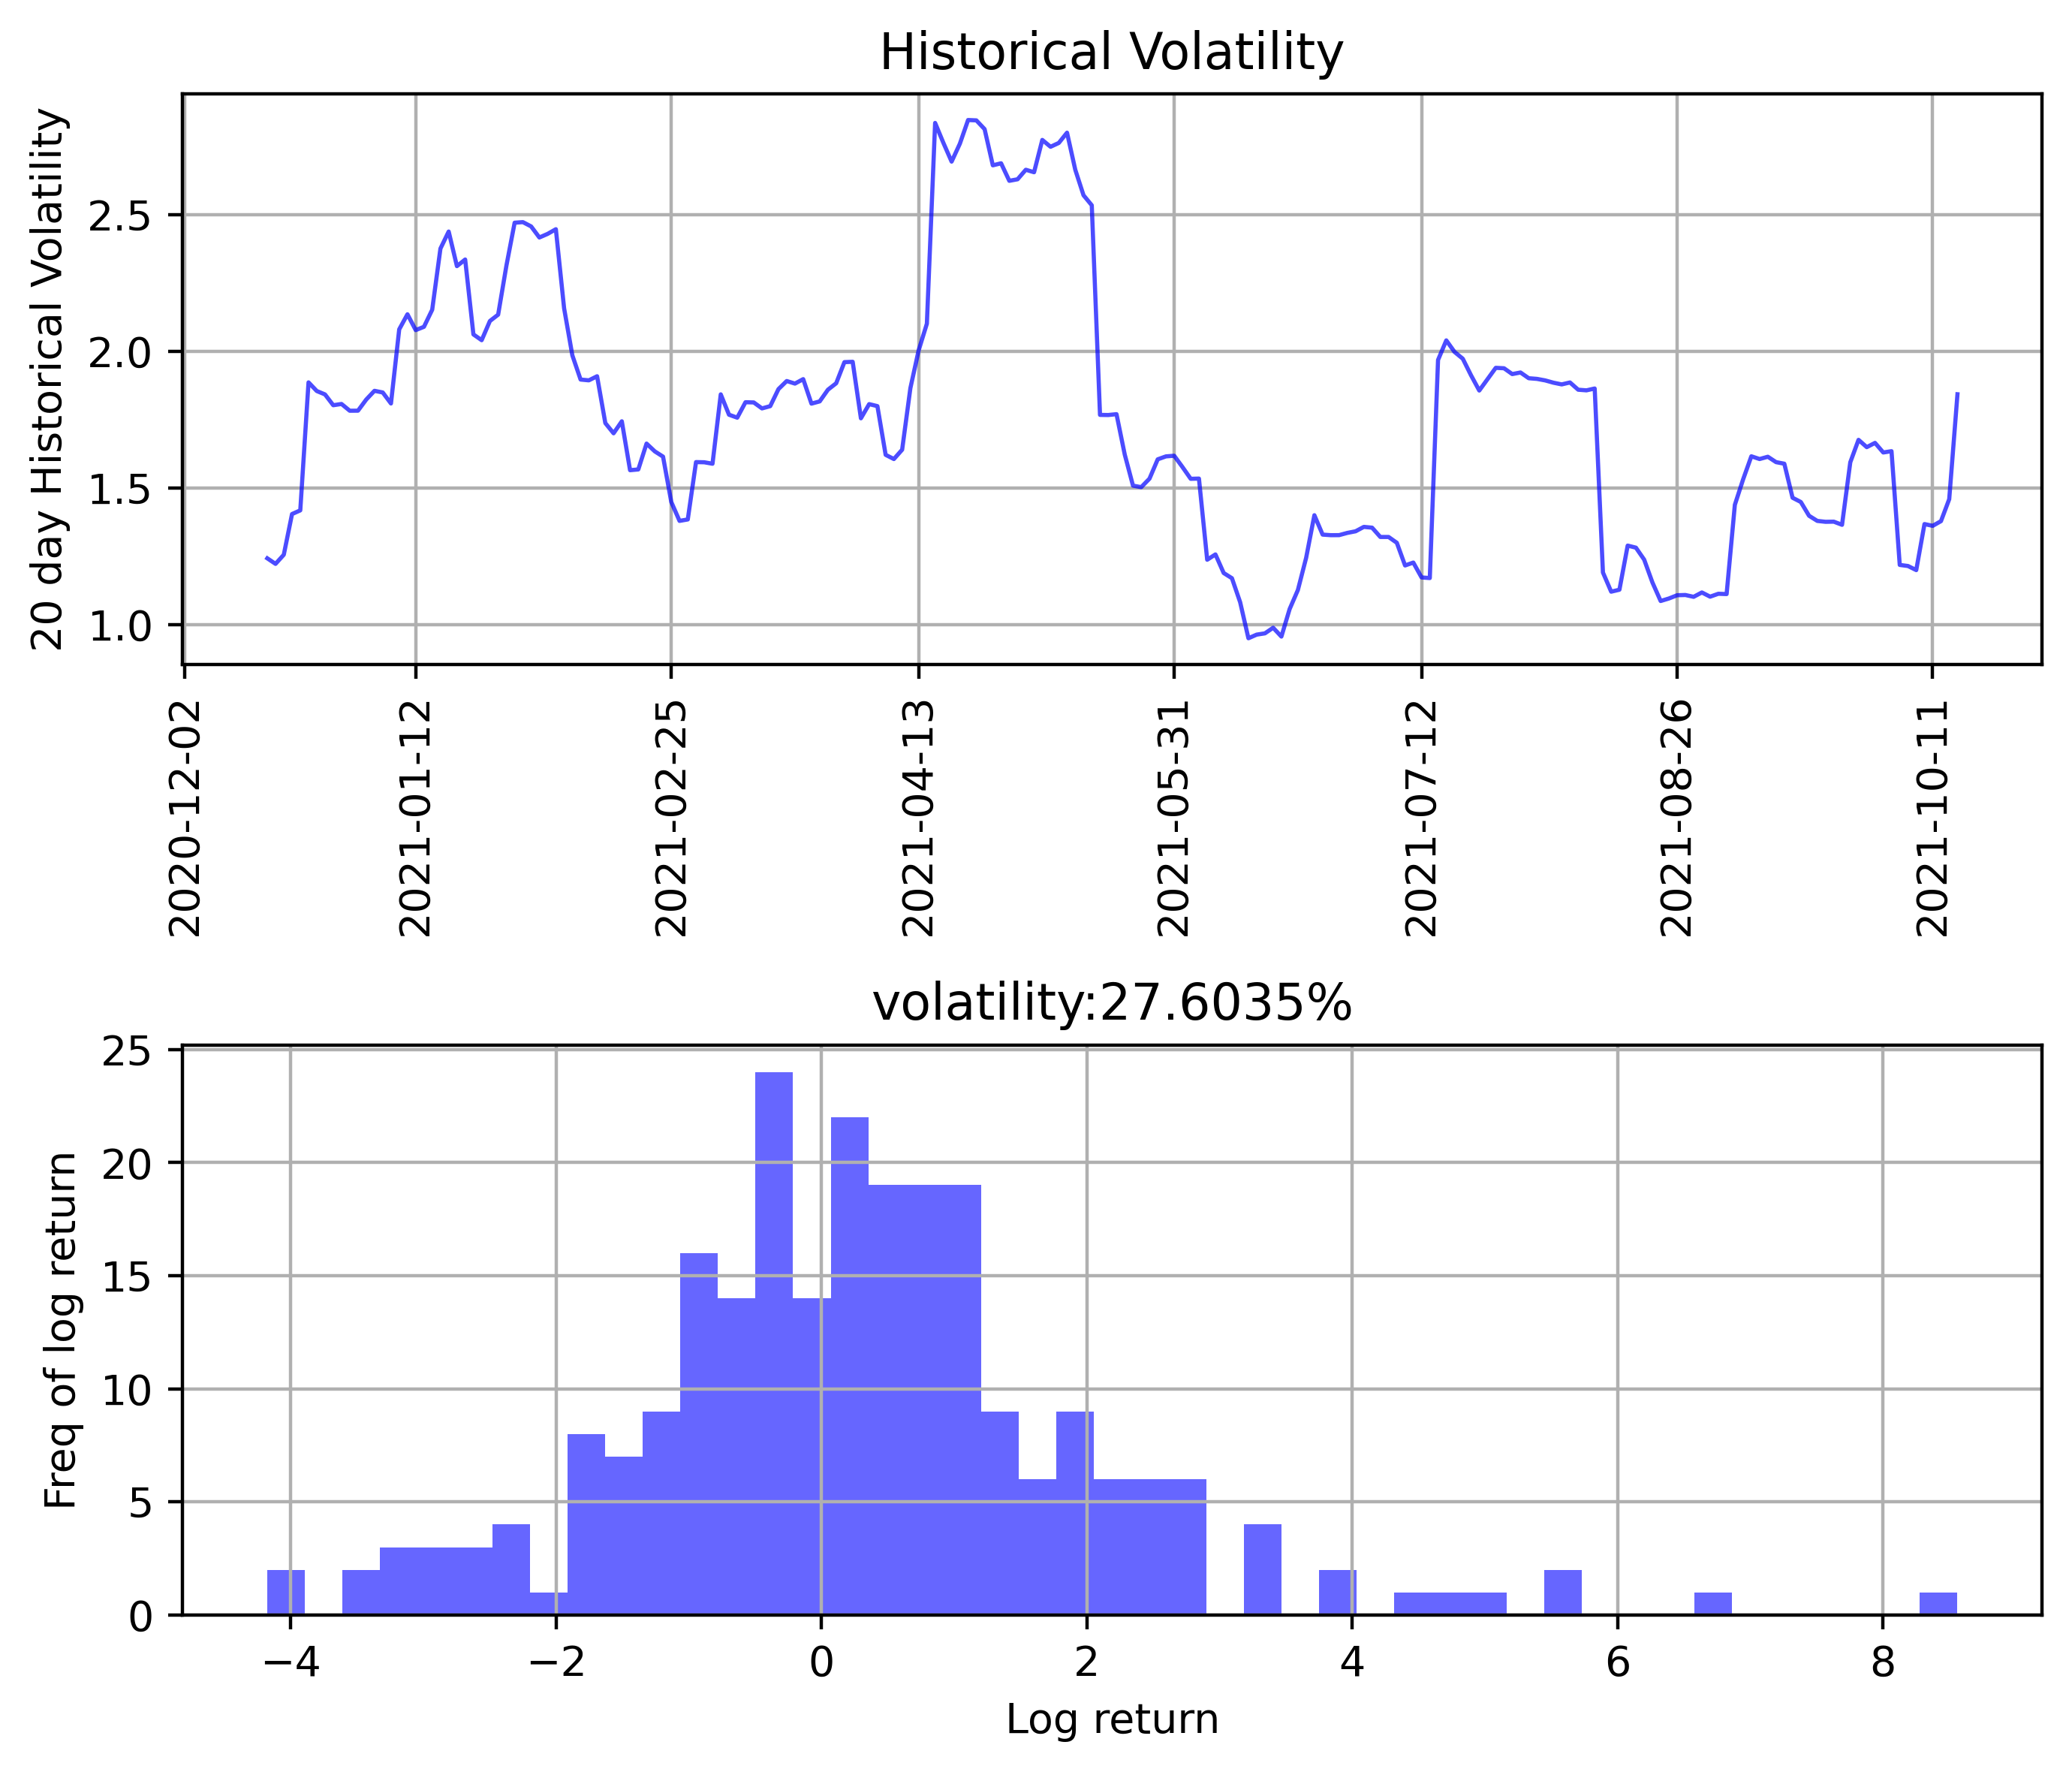

In [162]:
stock.Volatility_distribution(df1)

In [163]:
ndays=30
stock.sd_price(df1, ndays)

Number of days =  247
Daily Average/Mean    =  0.3075 %
Daily Std./Volatility =  1.76 %
Annual Std./Volatility =  27.6606 %
Current Market Price =  708.25 Rs

1SD: 68% Probability in a year
1Yr UP from 1SD   =  1442.1 Rs
1Yr Low from 1SD   =  366.22 Rs

2SD: 95% Probability in a year
1Yr UP from 2SD    =  1638.0 Rs
1Yr Low from 2SD   =  562.12 Rs

1SD: 68% Probability in  30 Days
30  days UP from 1SD   =  841.86 Rs
30  days Low from 1SD   =  711.19 Rs

2SD: 95% Probability in  30 Days
30  days UP from 2SD    =  910.14 Rs
30  days Low from 2SD   =  779.46 Rs


In [30]:
stock.sd_price(df2, ndays)

Number of days =  247
Daily Average/Mean    =  0.1255 %
Daily Std./Volatility =  1.37 %
Annual Std./Volatility =  21.5312 %
Current Market Price =  3611.45 Rs

1SD: 68% Probability in a year
1Yr UP from 1SD   =  5508.54 Rs
1Yr Low from 1SD   =  3269.54 Rs

2SD: 95% Probability in a year
1Yr UP from 2SD    =  6286.13 Rs
1Yr Low from 2SD   =  4047.13 Rs

1SD: 68% Probability in  30 Days
30  days UP from 1SD   =  4018.42 Rs
30  days Low from 1SD   =  3746.47 Rs

2SD: 95% Probability in  30 Days
30  days UP from 2SD    =  4289.41 Rs
30  days Low from 2SD   =  4017.47 Rs
